<a href="https://colab.research.google.com/github/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/blob/main/3_dimensionality_reduction_clustering_sol_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 3 - Métodos no supervisados 2

## t-distributed stochastic neighbor embedding

Dentro de la librerias de Sklearn se puede encontrar el método "sklearn.manifold.TSNE" el cual se implementa igual que PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
from sklearn.metrics import (homogeneity_score,completeness_score,v_measure_score)
# Módulo donde encontramos el método t-Distributed Stochastic Neighbor Embedding
from sklearn.manifold import (Isomap,LocallyLinearEmbedding,MDS,TSNE)

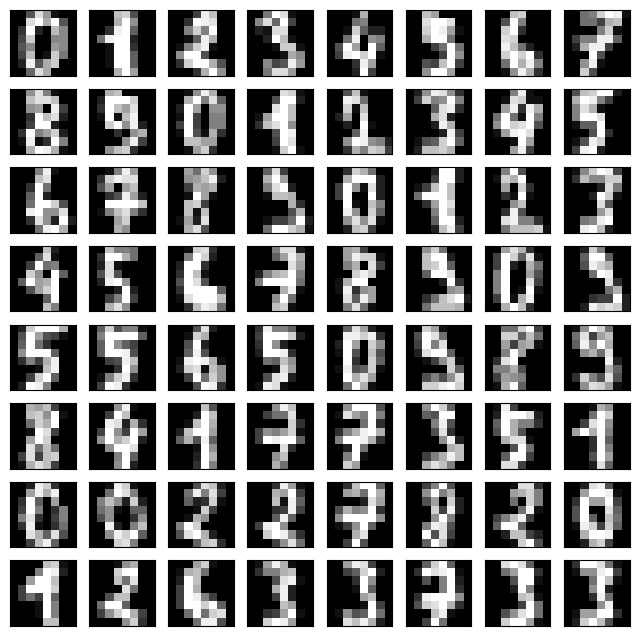

In [2]:
#Mnist otra vez :)
mnist = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/mnist.csv")
y = mnist['label']

#Visualización
fig,axs = plt.subplots(8,8,figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axs.flat):
    ax.imshow(
        mnist.iloc[i,:-1].values.reshape(8,-1),
        cmap="gray"
    )

In [3]:
from sklearn.preprocessing import MinMaxScaler

#Función para graficar "bonito"
def plot_embedding(X, title, ax=None):
    X = MinMaxScaler().fit_transform(X)
    for digit in np.unique(mnist.label):
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.tab10(digit),
            alpha=0.3,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    ax.set_title(title)

In [4]:
#Misma descomposición PCA de la clase pasada
pca_mnist_2d = sklearn.decomposition.PCA(2)
mnist_2d=pca_mnist_2d.fit_transform(mnist.iloc[:,:-1])

#Ajustamos un embedding de 2 dimensiones para visualización.
tsne_mnist_2d = TSNE(2, perplexity=30.0, random_state=11, init="random")
mnist_2d_tsne=tsne_mnist_2d.fit_transform(mnist.iloc[:,:-1])
mnist_2d_tsne.shape

(1797, 2)

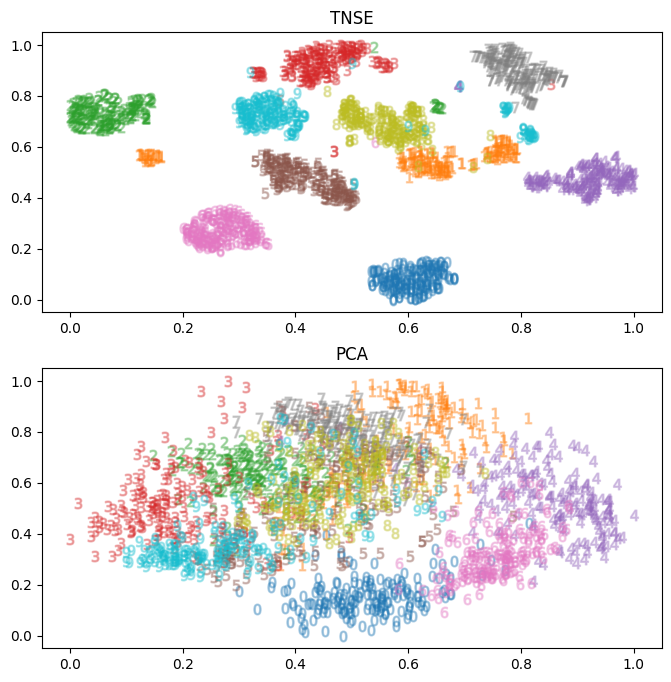

In [5]:
#Primero deben instancias las figuras y luego entregar la posicisión de esta a la función
_, ax = plt.subplots(2 , figsize=(8, 8))

#TNSE
plot_embedding(mnist_2d_tsne, "TNSE", ax[0])

#PCA
plot_embedding(mnist_2d, "PCA", ax[1])

Este método agrupa de mucho mejor manera los números para los datos `MNIST`.

## Actividad 1

Modifique el hiperparámetro `init` y varie los valores de `perplexity` visualizando cómo cambian los resultados.

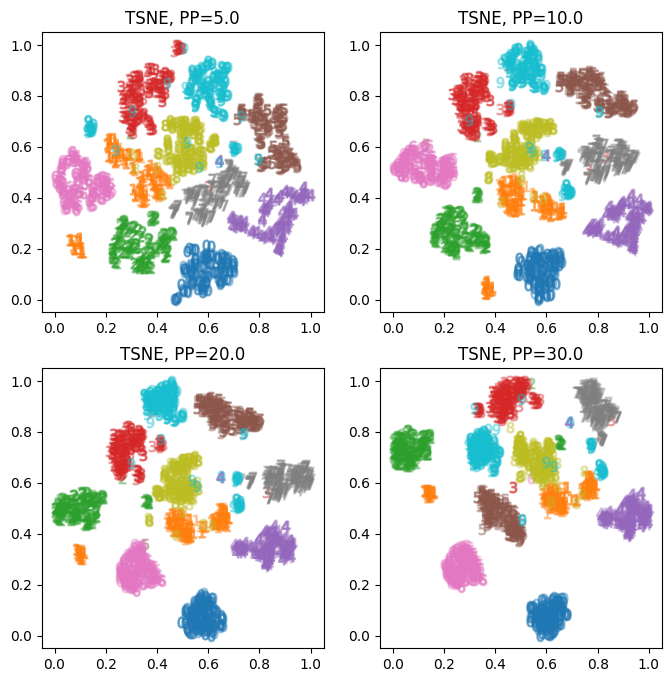

In [7]:
#Prográmame
#Variación de 4 perplexities init='random'
perplexities = [5.0, 10.0, 20.0, 30.0]
_, ax = plt.subplots(2, 2, figsize=(8, 8))
for i,axes in zip(perplexities,ax.flatten()):
  mnist_tsne = TSNE(2, perplexity=i, random_state=11, init="random")
  res = mnist_tsne.fit_transform(mnist.iloc[:,:-1])
  plot_embedding(res, f"TSNE, PP={i}", axes)

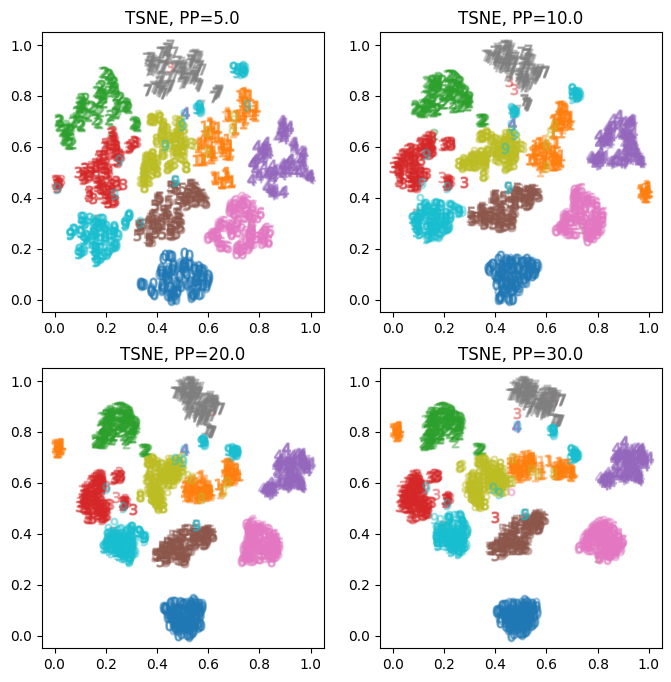

In [6]:
#Prográmame
#Variación de 4 perplexities init='pca'
perplexities = [5.0, 10.0, 20.0, 30.0]
_, ax = plt.subplots(2, 2, figsize=(8, 8))
for i,axes in zip(perplexities,ax.flatten()):
  mnist_tsne = TSNE(2, perplexity=i, random_state=11, init="pca")
  res = mnist_tsne.fit_transform(mnist.iloc[:,:-1])
  plot_embedding(res, f"TSNE, PP={i}", axes)

## Actividad 2

Realice la transformación de los datos a 2 dimensiones con Isomaps `Isomap`, Locally Linear Embedding `LocallyLinearEmbedding`, Multi-dimensional Scaling `MDS` y comparelo con TNSE. ¿Cuál de los métodos funciona mejor?

[Más información](https://scikit-learn.org/stable/modules/manifold.html)

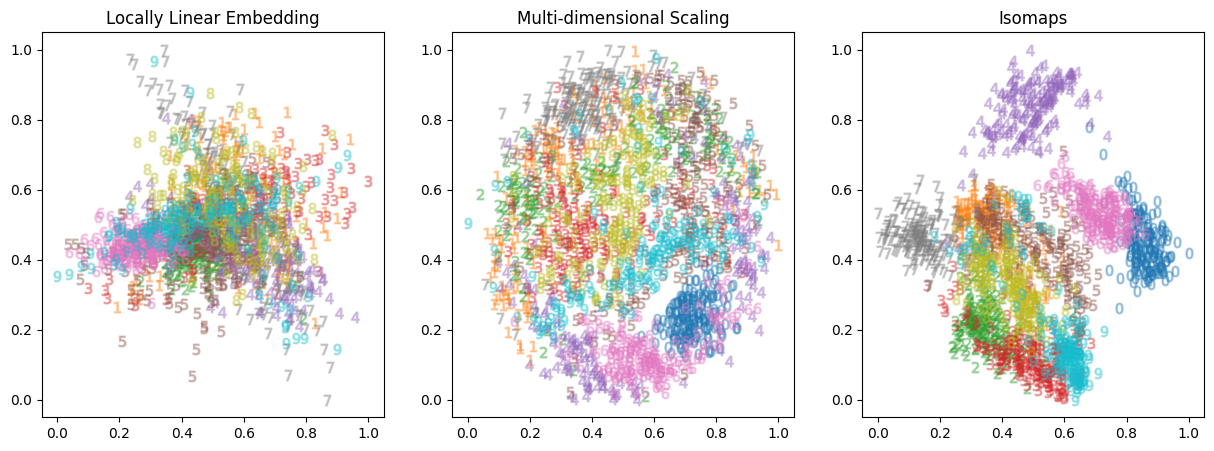

In [8]:
#Prográmame
_, ax = plt.subplots(1,3, figsize=(15, 5))

mnist_LLE = LocallyLinearEmbedding(n_neighbors=30, n_components=2).fit_transform(mnist.iloc[:,:-1])
mnist_MDS = MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2, normalized_stress="auto").fit_transform(mnist.iloc[:,:-1])
mnist_ISO = Isomap(n_neighbors=30, n_components=2).fit_transform(mnist.iloc[:,:-1])

plot_embedding(mnist_LLE, "Locally Linear Embedding",ax[0])
plot_embedding(mnist_MDS, "Multi-dimensional Scaling",ax[1])
plot_embedding(mnist_ISO, "Isomaps",ax[2])

# *Clustering*

El clustering o agrupamiento es la tarea de agrupar una serie de objetos de una manera que objetos del mismo grupo (cluster) son más similares entre sí que con los de otros grupos. Su objetivo principal es en la fase exploratoria de los datos y se clasifica dentro de los métodos no supervisados de aprendizaje de máquinas.



In [9]:
import sklearn.cluster # Algoritmos de clustering
from sklearn.datasets import make_blobs, make_moons

#Crear Blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=5000, centers=centers, cluster_std=0.4, random_state=11
)

#Escalar con minmaxscaler
X = MinMaxScaler().fit_transform(X)
X.shape

(5000, 2)

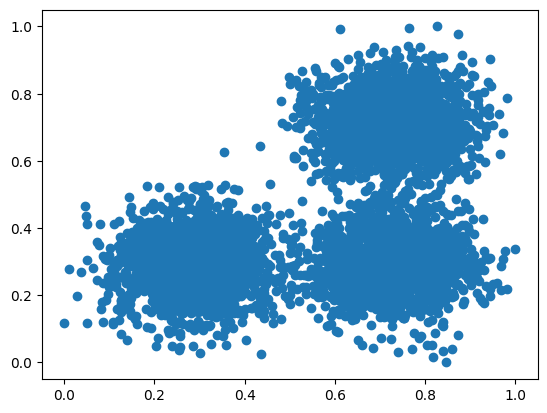

In [10]:
plt.scatter(X[:,0], X[:,1]) # Exploramos la distribución que tienen nuestros datos

Intuitivamente podemos desprender que existe cierto agrupamiento de los datos. Uno de los algoritmos para realizar clustering es el k-means que se encuentra implementado en la clase `sklearn.cluster.KMeans`. Procederemos a realizar un agrupamiento utilizando este algoritmo.

[Más información](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [11]:
# Instanciamos el algoritmo de k-means
km = sklearn.cluster.KMeans(n_clusters=2, random_state=11)
km.fit(X)

KMeans(n_clusters=2, random_state=11)

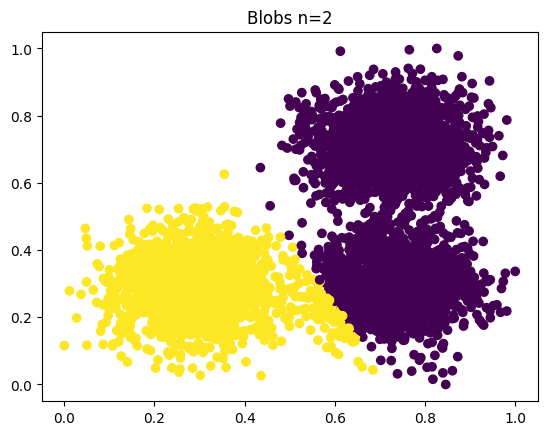

In [12]:
# Verificamos gráficamente el agrupamiento
plt.scatter(X[:,0], X[:,1], c = km.labels_)
plt.title("Blobs n=2")
plt.show()

¿Qué pasó, es correcto el número de grupos utilizado en el modelo?. ¿Cómo podemos evaluar de una manera más sistemática el correcto número de grupos?.

[Métricas de evaluación](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)

In [13]:
print(f"Homogeneity: {homogeneity_score(labels_true, km.labels_):.3f}")
#Un resultado del cluster satisface la homogeneidad si todos sus grupos contienen solo puntos de datos que son miembros de una sola clase.

print(f"Completeness: {completeness_score(labels_true, km.labels_):.3f}")
#Un resultado del cluster satisface la integridad (completness) si todos los puntos de datos que son miembros de una clase dada son elementos del mismo grupo.

print(f"V-measure: {v_measure_score(labels_true, km.labels_):.3f}")
#v = (1 + beta) * homogeneity * completeness/ (beta * homogeneity + completeness).

Homogeneity: 0.520
Completeness: 0.882
V-measure: 0.655


¿Pero que sucede si no tenemos `labels`?

![Codo](https://jarroba.com/wp-content/uploads/2016/09/Elbow_ds1_2.png)

## Actividad 3

Programa un ciclo para evaluar el mejor número de clusters y grafica los resultados. Recuerda el criterio que se mostro en clases para evaluar la calidad del clustering

In [14]:
# TODO: Programa un ciclo para evaluar el mejor número de clusters y grafica los resultados.
# Hint: Utilize el método del codo
inertias = []
n_clusters_iterable = range(1,10)
for n_clusters in n_clusters_iterable:
    km_test = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11, n_init="auto") # Instanciamos el algoritmo de k-means
    km_test.fit(X)
    inertias.append(km_test.inertia_)

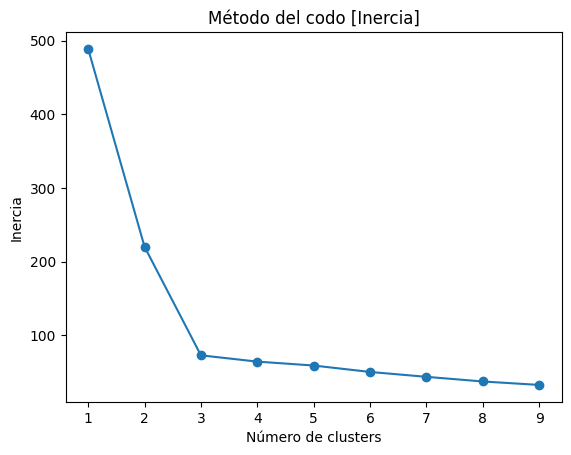

In [20]:
#Veamos la inercia de Kmeans para los Blobs
plt.plot(n_clusters_iterable,inertias, marker='o')
plt.title("Método del codo [Inercia]")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

Creamos un nuevo dataset con forma de luna, conocido como `moons`

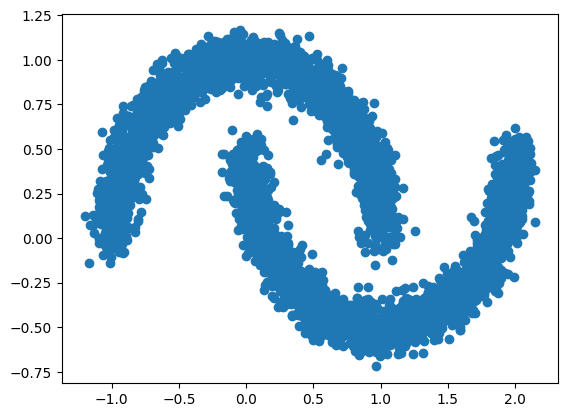

In [21]:
moons, labels_moon = make_moons(n_samples=5000, noise=0.07)
plt.scatter(moons[:,0], moons[:,1])

In [22]:
km_moon = sklearn.cluster.KMeans(n_clusters=2, random_state=11)
km_moon.fit(moons)

KMeans(n_clusters=2, random_state=11)

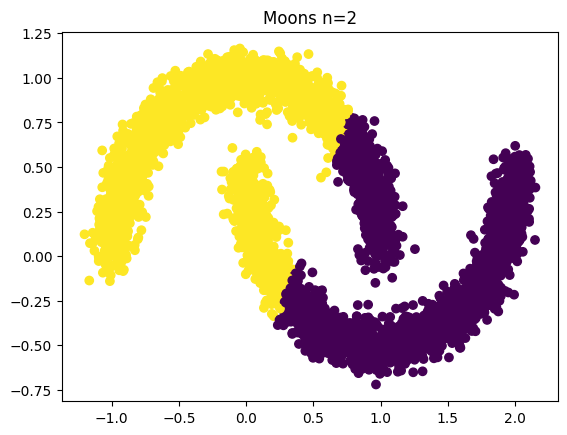

In [23]:
plt.scatter(moons[:,0], moons[:,1], c = km_moon.labels_)
plt.title("Moons n=2")
plt.show()

## Actividad 4

K-Means no funciona en este caso. Realiza un dendrograma de los datos para seleccionar el número óptimo de clusters y utilize otra técnica de clusterización.

HINT:
[https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html):
![Clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


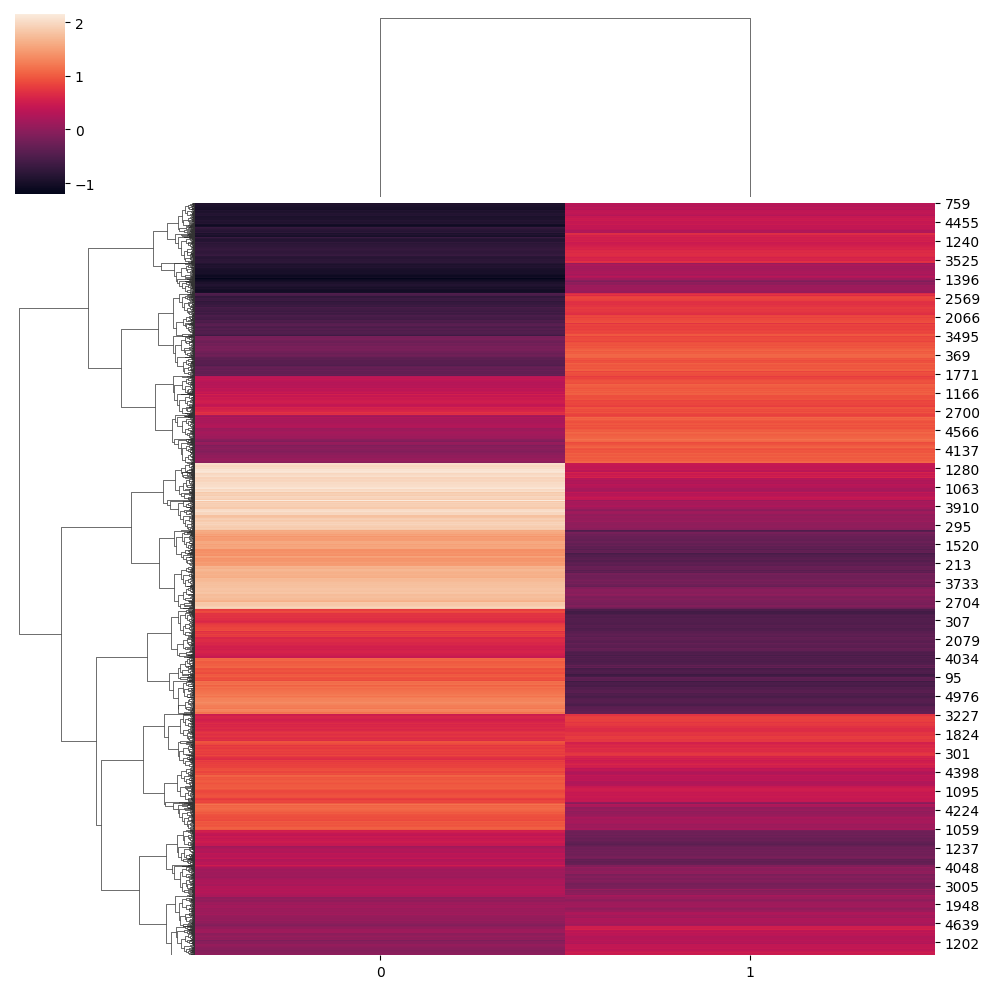

In [24]:
# HINT: import seaborn as sns; sns.clustermap()
# Prográmame
import seaborn as sns
sns.clustermap(moons)
plt.show()

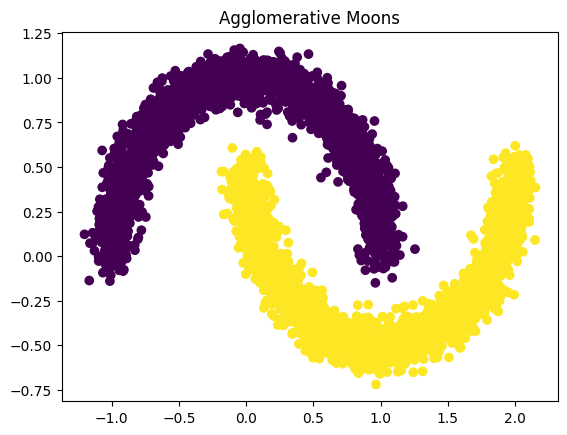

In [25]:
ac = sklearn.cluster.AgglomerativeClustering(linkage='single')
ac.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c = ac.labels_)
plt.title("Agglomerative Moons")
plt.show()

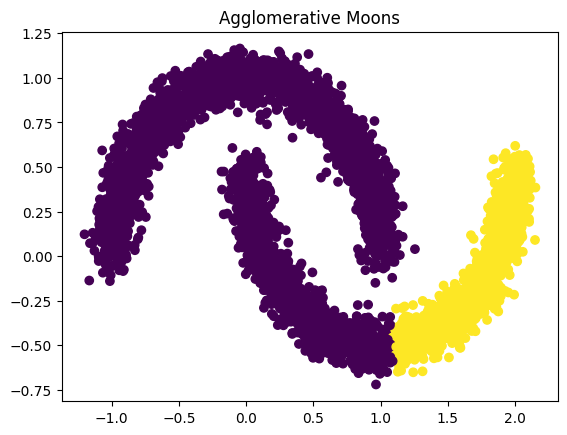

In [26]:
ac = sklearn.cluster.AgglomerativeClustering(linkage='ward')
ac.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c = ac.labels_)
plt.title("Agglomerative Moons")
plt.show()

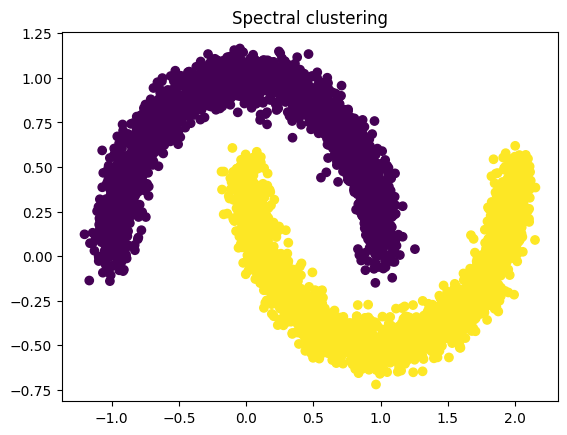

In [29]:
ac = sklearn.cluster.SpectralClustering(n_clusters=2,eigen_solver="arpack",affinity="nearest_neighbors")
ac.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c = ac.labels_)
plt.title("Spectral clustering")
plt.show()

### Ejemplo con grilla

In [52]:
# Valores eigen solver probaremos
valores_eigen_solver = ['arpack', 'lobpcg']
# Valores affinity probaremos
valores_affinity = ['nearest_neighbors','rbf']

# Se construye grilla de valores (todas las combinaciones)
grilla = np.array(np.meshgrid(valores_eigen_solver,valores_affinity)).T.reshape(-1,2)
grilla

array([['arpack', 'nearest_neighbors'],
       ['arpack', 'rbf'],
       ['lobpcg', 'nearest_neighbors'],
       ['lobpcg', 'rbf']], dtype='<U17')

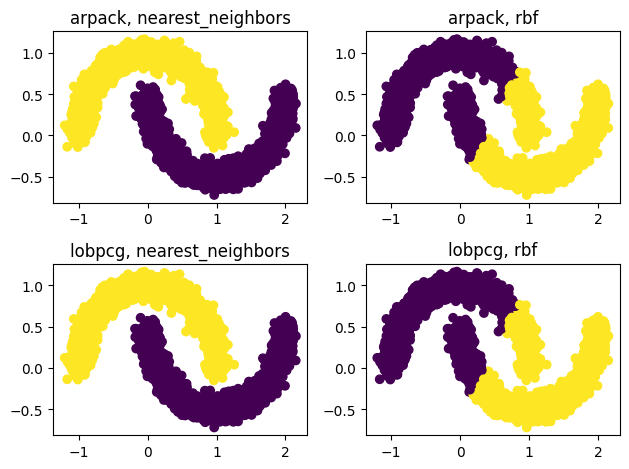

In [53]:
# Se construye la figura
fig, ax = plt.subplots(2, 2)

# Se recorre los resultados de la grilla y el plot
for grilla_values,axes in zip(grilla, ax.flatten()):
  # La grilla entrega un vector con dos valroes, eigen_solver_value y affinity_value
  eigen_solver_value = grilla_values[0]
  affinity_value = grilla_values[1]

  # Se aplica el cluster
  cluster = sklearn.cluster.SpectralClustering(n_clusters=2,eigen_solver=eigen_solver_value,affinity=affinity_value)
  cluster.fit(moons)

  # Se grafica en el plot
  axes.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_)
  axes.set_title(f"{eigen_solver_value}, {affinity_value}")

# Plot
fig.tight_layout()
plt.show()

## Actividad 5 (opcional): Datos de microarreglo
Implementa el algoritmo de agrupamiento más correcto para analizar los siguientes datos de microarreglo. Agrupa tanto por gen como por linea celular e interpreta los resultados.

In [70]:
microarray = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/gene_expressions_clase_3.tsv", sep="\t", index_col="gene")
microarray

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,-0.359754,0.770246,0.040246,-0.259754,-0.199754,0.130246,-0.199754,-0.699754,-0.869754,0.580246,...,0.050246,0.690246,0.040246,0.810246,0.350246,-0.619754,-0.129754,-0.379754,-0.159754,-0.399754
ZXDB,-0.193538,0.386462,0.616462,-0.533538,-0.083538,-0.233538,0.666462,-0.323538,-0.313538,1.026462,...,0.196462,0.856462,0.256462,1.666462,0.466462,-0.413538,0.576462,0.106462,-0.253538,-0.413538
ZXDC,-0.565677,-0.705677,-0.775677,-1.125677,-0.785677,-0.545677,0.454323,0.224323,-0.945677,-0.695677,...,-0.215677,0.064323,0.034323,0.524323,-0.085677,-0.995677,-0.625677,-0.125677,-0.035677,-0.615677


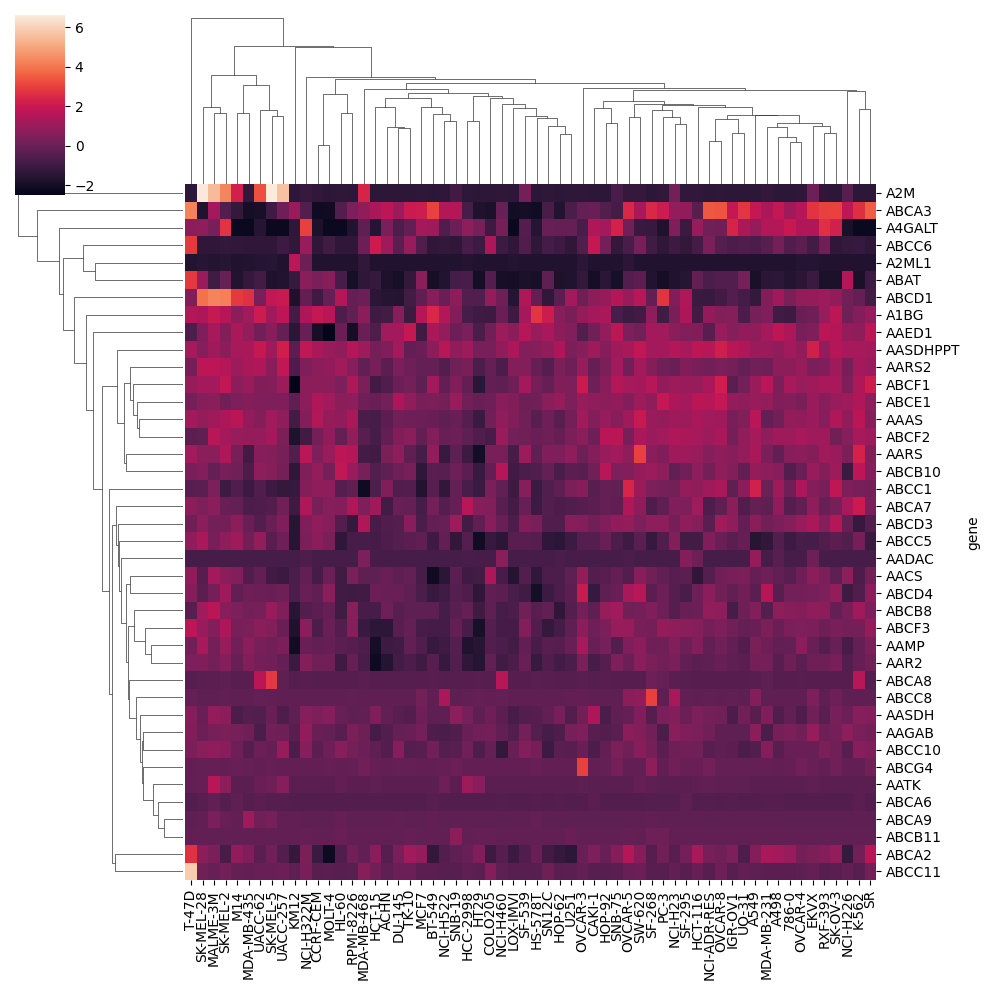

In [89]:
# TODO: Entrenamiento, ajuste y visualización de un modelo de clustering para microarreglo.

sns.clustermap(microarray.iloc[:40,:],yticklabels=True,xticklabels=True)
plt.show()